In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.regularizers import l1
from keras.regularizers import l1_l2
print(tf.__version__)

2.2.0-rc1


Using TensorFlow backend.


In [0]:
mnist = tf.keras.datasets.mnist


1. Training set: The first 5000 of the original 60000 training images. Testing set: same as the original testing test.

11493376/11490434 [==============================] - 0s 0us/step


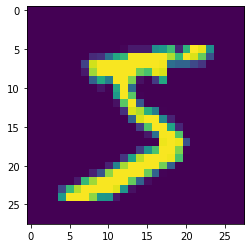

In [4]:
(all_training_images, all_training_labels),(all_test_images,all_test_labels) = mnist.load_data()
plt.imshow(all_training_images[0])

In [0]:
print(all_training_images.shape)

(60000, 28, 28)


Slicing to get 5k images

In [0]:
training_images_fivek = all_training_images[0:5000]
training_images_labels_fivek = all_training_labels[0:5000]


print(training_images_labels_fivek[1])

0


In [0]:
training_images_fivek = training_images_fivek/255.0
testing_images_fivek = all_test_images/255.0

In [0]:


# reg = l2(0.01)
model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            
           
            tf.keras.layers.Dense(128,activation = tf.nn.relu),
            
            
            tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])
model.compile(optimizer =tf.keras.optimizers.Adam(
    learning_rate=0.001), loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(training_images_fivek,training_images_labels_fivek,epochs=25,validation_data=(testing_images_fivek,all_test_labels),batch_size=32)
accuracy = model.evaluate(all_test_images,all_test_labels)[1]
print("Accuarcy :", accuracy)


Epoch 1/25
157/157 [==============================] - 1s 5ms/step - loss: 0.6833 - accuracy: 0.8188 - val_loss: 0.3717 - val_accuracy: 0.8959
Epoch 2/25
157/157 [==============================] - 1s 5ms/step - loss: 0.2909 - accuracy: 0.9188 - val_loss: 0.3163 - val_accuracy: 0.9077
Epoch 3/25
157/157 [==============================] - 1s 5ms/step - loss: 0.2139 - accuracy: 0.9430 - val_loss: 0.2804 - val_accuracy: 0.9182
Epoch 4/25
157/157 [==============================] - 1s 5ms/step - loss: 0.1713 - accuracy: 0.9540 - val_loss: 0.2831 - val_accuracy: 0.9108
Epoch 5/25
157/157 [==============================] - 1s 5ms/step - loss: 0.1393 - accuracy: 0.9624 - val_loss: 0.2378 - val_accuracy: 0.9285
Epoch 6/25
157/157 [==============================] - 1s 5ms/step - loss: 0.1055 - accuracy: 0.9732 - val_loss: 0.2320 - val_accuracy: 0.9296
Epoch 7/25
157/157 [==============================] - 1s 5ms/step - loss: 0.0859 - accuracy: 0.9794 - val_loss: 0.2425 - val_accuracy: 0.9273
Epoch 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  100480    
_________________________________________________________________
dense_3 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


ERROR! Session/line number was not unique in database. History logging moved to new session 62


Text(0.5, 1.0, 'Training and Testing loss')

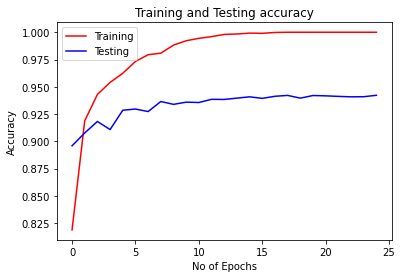

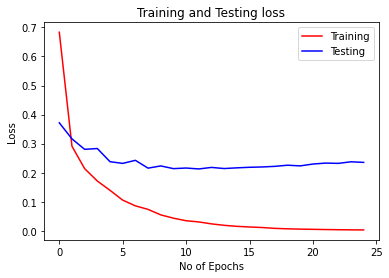

In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs, acc, 'r',label='Training')
plt.plot(epochs, val_acc, 'b',label ='Testing')
plt.title('Training and Testing accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'r',label='Training')
plt.plot(epochs, val_loss, 'b',label='Testing')
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title('Training and Testing loss')



In [0]:
training_images_onek = all_training_images[0:1000]
training_images_labels_onek = all_training_labels[0:1000]


In [0]:
training_images_onek = training_images_onek/255.0


In [0]:


model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation = tf.nn.relu,kernel_regularizer=l1(0.0001)),
            tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])
model.compile(optimizer =tf.keras.optimizers.Adam(
    learning_rate=0.001), loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])
history1 = model.fit(training_images_onek,training_images_labels_onek,epochs=100,validation_data=(all_test_images/255.0,all_test_labels),batch_size=32)
 
model.summary()

Epoch 1/100
32/32 [==============================] - 1s 20ms/step - loss: 2.1916 - accuracy: 0.7010 - val_loss: 1.5494 - val_accuracy: 0.8166
Epoch 2/100
32/32 [==============================] - 1s 17ms/step - loss: 1.2150 - accuracy: 0.8900 - val_loss: 1.2256 - val_accuracy: 0.8556
Epoch 3/100
32/32 [==============================] - 1s 17ms/step - loss: 0.9732 - accuracy: 0.9320 - val_loss: 1.1236 - val_accuracy: 0.8660
Epoch 4/100
32/32 [==============================] - 1s 17ms/step - loss: 0.8374 - accuracy: 0.9530 - val_loss: 1.0068 - val_accuracy: 0.8819
Epoch 5/100
32/32 [==============================] - 1s 17ms/step - loss: 0.7374 - accuracy: 0.9700 - val_loss: 0.9688 - val_accuracy: 0.8789
Epoch 6/100
32/32 [==============================] - 1s 18ms/step - loss: 0.6657 - accuracy: 0.9760 - val_loss: 0.9372 - val_accuracy: 0.8710
Epoch 7/100
32/32 [==============================] - 1s 18ms/step - loss: 0.5986 - accuracy: 0.9930 - val_loss: 0.8798 - val_accuracy: 0.8812
Epoch 

In [0]:
print("Accuracy of Test set  : ",model.evaluate(all_test_images,all_test_labels)[1])

313/313 [==============================] - 1s 2ms/step - loss: 59.7917 - accuracy: 0.8991
Accuracy of Test set  :  0.8991000056266785


Text(0.5, 1.0, 'Training and Testing loss')

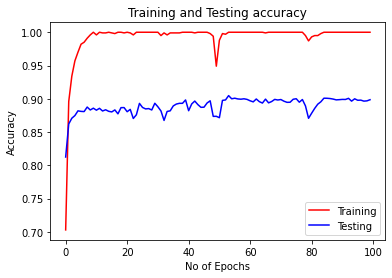

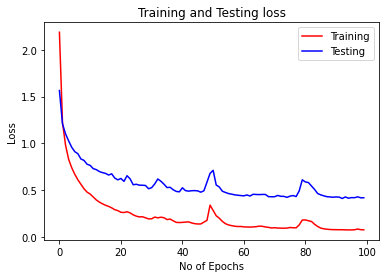

In [0]:
  import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs, acc, 'r',label='Training')
plt.plot(epochs, val_acc, 'b',label ='Testing')
plt.title('Training and Testing accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'r',label='Training')
plt.plot(epochs, val_loss, 'b',label='Testing')
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title('Training and Testing loss')



In [0]:
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_43 (Flatten)         multiple                  0         
_________________________________________________________________
dense_142 (Dense)            multiple                  401920    
_________________________________________________________________
dense_143 (Dense)            multiple                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

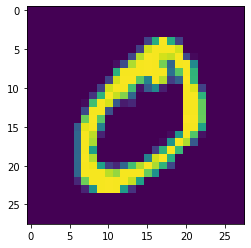

In [7]:

training_images_all = (all_training_images+765.0)/4

training_images_labels_all = all_training_labels
testing_images_all = (all_test_images+765)/4
testing_images_labels_all = all_test_labels



In [0]:
training_images_all = training_images_all/255.0
testing_images_all = testing_images_all/255.0
 

In [1]:
plt.imshow(training_images_all[1])

NameError: ignored

In [10]:
model3 = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512,activation = tf.nn.relu, kernel_regularizer=l1(0.0001)),
            tf.keras.layers.Dense(512,activation = tf.nn.relu, kernel_regularizer=l1(0.0001)),
            
            tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])
model3.compile(optimizer =tf.keras.optimizers.Adam(
    learning_rate=0.001), loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])
history2 = model3.fit(training_images_all,training_images_labels_all,epochs=100,validation_data=(testing_images_all,testing_images_labels_all),batch_size=128)



Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 2.0313 - accuracy: 0.5946 - val_loss: 1.0988 - val_accuracy: 0.7639
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 0.9154 - accuracy: 0.8120 - val_loss: 0.7651 - val_accuracy: 0.8398
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.7720 - accuracy: 0.8408 - val_loss: 0.6763 - val_accuracy: 0.8755
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 0.7118 - accuracy: 0.8591 - val_loss: 0.6400 - val_accuracy: 0.8795
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.6737 - accuracy: 0.8693 - val_loss: 0.6585 - val_accuracy: 0.8627
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.6455 - accuracy: 0.8737 - val_loss: 0.5524 - val_accuracy: 0.9027
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 0.6191 - accuracy: 0.8789 - val_loss: 0.6024 - val_accuracy: 0.8805

[0.11796023696660995, 0.0]

In [12]:
model3.evaluate(testing_images_all,testing_images_labels_all)

313/313 [==============================] - 1s 2ms/step - loss: 0.2380 - accuracy: 0.9632


[0.23795409500598907, 0.9631999731063843]

In [14]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  401920    
_________________________________________________________________
dense_4 (Dense)              multiple                  262656    
_________________________________________________________________
dense_5 (Dense)              multiple                  5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Training and Testing loss')

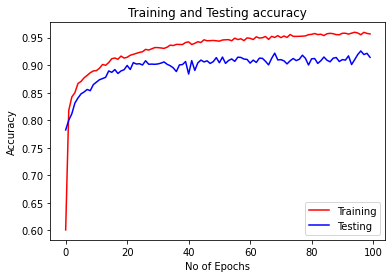

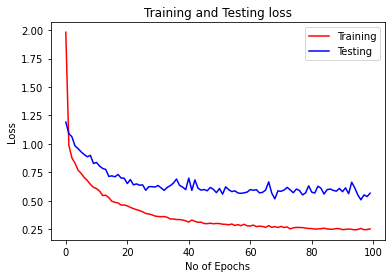

In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs, acc, 'r',label='Training')
plt.plot(epochs, val_acc, 'b',label ='Testing')
plt.title('Training and Testing accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'r',label='Training')
plt.plot(epochs, val_loss, 'b',label='Testing')
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title('Training and Testing loss')



In [0]:
import numpy as np
training_images_set1 = all_training_images[:40000]
training_images_set2 = all_training_images[10001:50001]
training_images_set3 = all_training_images[20000:]
training_images_labels_set1 = all_training_labels[:40000]
training_images_labels_set2 = all_training_labels[10001:50001]
training_images_labels_set3 = all_training_labels[20000:]
training_images_triplemnist = np.concatenate((training_images_set1,training_images_set2,training_images_set3),axis=-1) 
training_labels_triplemnist = []
for i in range(len(training_images_labels_set1)):
    training_labels_triplemnist.append(str(training_images_labels_set1[i])+str(training_images_labels_set2[i])+str(training_images_labels_set3[i]))
    training_labels_triplemnist[i] = int(training_labels_triplemnist[i])
training_labels_triplemnist = np.array(training_labels_triplemnist)


566


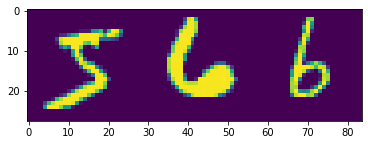

In [6]:
testing_images_set1 = all_training_images[:8000]
testing_images_set2 = all_training_images[8001:16001]
testing_images_set3 = all_training_images[52000:]
testing_images_labels_set1 = all_training_labels[:8000]
testing_images_labels_set2 = all_training_labels[8001:16001]
testing_images_labels_set3 = all_training_labels[52000:]
testing_images_triplemnist = np.concatenate((testing_images_set1,testing_images_set2,testing_images_set3),axis=-1) 
testing_labels_triplemnist = []
for i in range(len(testing_images_labels_set1)):
    testing_labels_triplemnist.append(str(testing_images_labels_set1[i])+str(testing_images_labels_set2[i])+str(testing_images_labels_set3[i]))
    testing_labels_triplemnist[i] = int(testing_labels_triplemnist[i])
testing_labels_triplemnist = np.array(testing_labels_triplemnist)
print(testing_labels_triplemnist[0])
plt.imshow(testing_images_triplemnist[0])




In [0]:
training_images_triplemnist= training_images_triplemnist/255.0
testing_images_triplemnist = testing_images_triplemnist/255.0 

In [0]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512,activation = tf.nn.relu,kernel_regularizer=l1(0.001)),
            tf.keras.layers.Dense(512,activation = tf.nn.relu,kernel_regularizer=l1(0.001)),
            
         
            tf.keras.layers.Dense(2048,activation = tf.nn.relu,kernel_regularizer=l1(0.001)),
          
            tf.keras.layers.Dense(1024,activation = tf.nn.relu,kernel_regularizer=l1(0.001)),
            tf.keras.layers.Dense(1024,activation = tf.nn.relu,kernel_regularizer=l1(0.001)),
            
            tf.keras.layers.Dense(1000, activation = tf.nn.softmax)
])
model.compile(optimizer =tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])
history2 = model.fit(training_images_triplemnist,training_labels_triplemnist,epochs=100,validation_data=(testing_images_triplemnist,testing_labels_triplemnist),batch_size=128)
 


Epoch 1/100
313/313 [==============================] - 2s 6ms/step - loss: 126.7592 - accuracy: 0.0060 - val_loss: 106.1412 - val_accuracy: 0.0286
Epoch 2/100
313/313 [==============================] - 2s 6ms/step - loss: 89.2267 - accuracy: 0.1468 - val_loss: 75.4533 - val_accuracy: 0.2411
Epoch 3/100
313/313 [==============================] - 2s 5ms/step - loss: 64.9945 - accuracy: 0.4257 - val_loss: 56.6955 - val_accuracy: 0.3915
Epoch 4/100
313/313 [==============================] - 2s 6ms/step - loss: 49.1534 - accuracy: 0.5895 - val_loss: 43.5089 - val_accuracy: 0.4868
Epoch 5/100
313/313 [==============================] - 2s 5ms/step - loss: 37.8473 - accuracy: 0.6658 - val_loss: 33.8003 - val_accuracy: 0.5510
Epoch 6/100
313/313 [==============================] - 2s 6ms/step - loss: 29.4779 - accuracy: 0.7042 - val_loss: 26.6289 - val_accuracy: 0.5587
Epoch 7/100
313/313 [==============================] - 2s 6ms/step - loss: 23.2044 - accuracy: 0.7160 - val_loss: 21.0948 - val_

In [0]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_29 (Flatten)         multiple                  0         
_________________________________________________________________
dense_103 (Dense)            multiple                  1204736   
_________________________________________________________________
dense_104 (Dense)            multiple                  262656    
_________________________________________________________________
dense_105 (Dense)            multiple                  1050624   
_________________________________________________________________
dense_106 (Dense)            multiple                  2098176   
_________________________________________________________________
dense_107 (Dense)            multiple                  1049600   
_________________________________________________________________
dense_108 (Dense)            multiple                

Text(0.5, 1.0, 'Training and Testing loss')

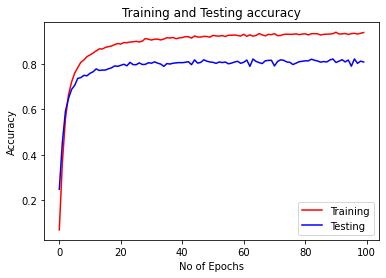

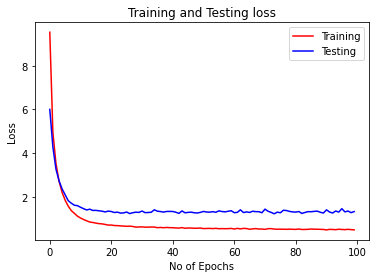

In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs, acc, 'r',label='Training')
plt.plot(epochs, val_acc, 'b',label ='Testing')
plt.title('Training and Testing accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'r',label='Training')
plt.plot(epochs, val_loss, 'b',label='Testing')
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title('Training and Testing loss')

